In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.utils.visualize_util import plot
from keras.models import model_from_json



%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import time
import png

Using Theano backend.


In [2]:
#Load origional MNIST Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#seperate zeros from the rest of the data
zeros_seperate_images = []
for i in range(len(y_train)):
    if y_train[i] == 9:
        zeros_seperate_images.append(X_train[i])
        

In [4]:
#Add noise to the images

noise = 50 #Must be a number between 0 and 255

def addNoiseToImage(X, noiseRange):
    for i in range(len(X)):
        for j in range(len(X[0])):
            if X[i][j] == 0:
                X[i][j] = np.random.random()*noiseRange
            

In [5]:
# Function for saving output to file for black and
# white viewing and future reference
# takes in a np.array and writes it to a png file
def saveImage(s,fileName):
    f = open(fileName, 'wb')      # binary mode is important
    w = png.Writer(len(s[0]), len(s), greyscale=True, bitdepth=8)
    w.write(f, s)
    f.close()


In [6]:
addNoiseToImage(zeros_seperate_images[1], noise)

('Number of Zeros: ', 5949)


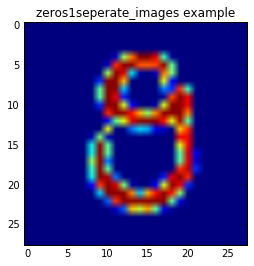

In [7]:
print('Number of Zeros: ', len(zeros_seperate_images))
plt.imshow(zeros_seperate_images[9])
plt.title('zeros1seperate_images example')
plt.show()

In [8]:
#Concatonation Function

# A function that takes in a 
# np.array(size:numberofImages x 28 x 28)
# mnist pictures in the first parameter and 
# the desired ouput size of one side of 
# the square final picture in the second parameter 
# and creates an imagewith the number placed 
# randomly in the image without overlapping

#the top left number in the image is the number of
#objects in the image, just did this for convenience

def insertImage(A, B, topLeftCoordinate):
    xi = topLeftCoordinate[0]
    yi = topLeftCoordinate[1]
    for i in range(28):
        for j in range(28):
            A[xi+i][yi+j] = B[i][j]

def updatePlacementMatrix(A, topLeftCoordinate):
    xi = topLeftCoordinate[0]
    yi = topLeftCoordinate[1]
    for i in range(28):
        for j in range(28):
            A[xi+i][yi+j] = 0
    

def concatonatedMnistData(images, size):
    newImg = [i[:] for i in [[0]*size]*size] #makes new matrix of zeros
    
    #a is a matrix that uses binary to keep track of inserted
    a = [i[:] for i in [[1]*size]*size] 
    
    placedNumbers = 0 
    iterations = 0
    while (iterations < 100) and (placedNumbers < len(images)):
        x = int(size*np.random.random()%(size-28))
        y = int(size*np.random.random()%(size-28))
        if a[x][y] and a[x][y+28] and a[x+28][y] and a[x+28][y+28]:
            updatePlacementMatrix(a, [x,y])
            insertImage(newImg, images[placedNumbers],[x,y])
            placedNumbers+=1
            iterations = 0
        iterations+=1
    newImg[0][0] = placedNumbers 
    return np.array(newImg),a
    

In [9]:
inputX,outputY = concatonatedMnistData(zeros_seperate_images[3:100], 100)
number_of_placed = inputX[0][0]
print number_of_placed

4


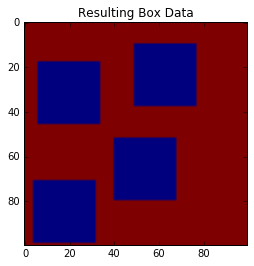

In [10]:
plt.imshow(outputY)
plt.title('Resulting Box Data')
plt.show()

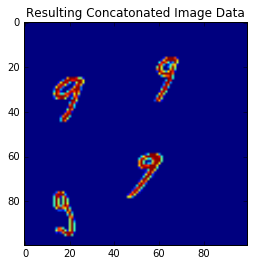

In [11]:
plt.imshow(inputX)
plt.title('Resulting Concatonated Image Data')
plt.show()

In [12]:
# Lets make some noise!!!!!
noise = 50
addNoiseToImage(inputX, noise)

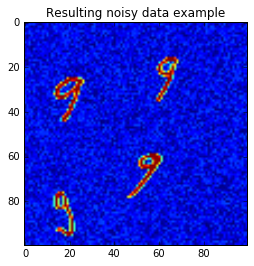

In [13]:
plt.imshow(inputX)
plt.title('Resulting noisy data example')
plt.show()

In [14]:
saveImage(inputX, 'example.png')

In [26]:
def makeConcatonatedImageData(images, newSize, maxImagesInNewImage):
    unplacedImages = len(images)-1
    i = 0
    j = maxImagesInNewImage
    Xinput = []
    Youtput = []
    Ycount = []
    while (unplacedImages > 0):
        x,y = concatonatedMnistData(images[i:j], newSize)
        number_of_placed = x[0][0]
        Xinput.append(x)
        Youtput.append(y)
        Ycount.append(number_of_placed)
        i += number_of_placed
        j += number_of_placed
        unplacedImages -= number_of_placed
    return Xinput, Youtput, Ycount
        
        
    

In [ ]:
X, Y1, Y2 = makeConcatonatedImageData(zeros_seperate_images, 100, 4)
print len(X)

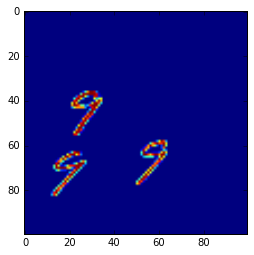

In [25]:
plt.imshow(X[1982])